## Leer datos del fichero csv

In [1]:
import numpy as np

data = np.loadtxt('web_traffic.tsv', delimiter='\t')

print(data.shape)

(743, 2)


In [5]:
print(data[:10])

[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00              nan]
 [  3.00000000e+00   1.38600000e+03]
 [  4.00000000e+00   1.36500000e+03]
 [  5.00000000e+00   1.48800000e+03]
 [  6.00000000e+00   1.33700000e+03]
 [  7.00000000e+00   1.88300000e+03]
 [  8.00000000e+00   2.28300000e+03]
 [  9.00000000e+00   1.33500000e+03]
 [  1.00000000e+01   1.02500000e+03]]


## Preparamos los datos

In [6]:
#tenemos coordenadas x,y
#una columna para las x y otra para las y
x = data[:, 0]
y = data[:, 1]

In [14]:
#eliminamos elementos nulos
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

## Gráfico de la evolución del tráfico en el último mes

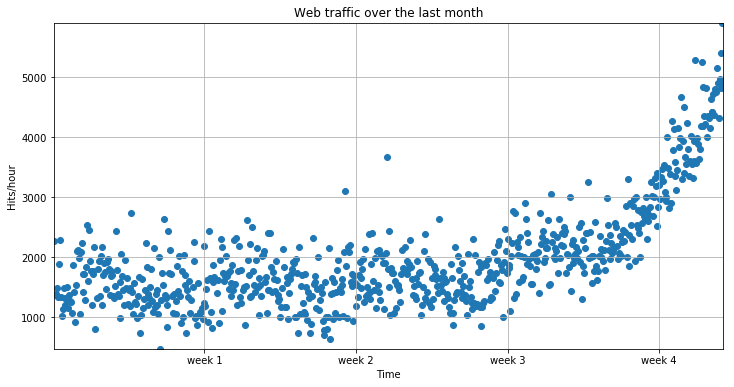

In [23]:
import matplotlib.pyplot as plot

plot.figure(figsize=(12,6))
plot.scatter(x, y)
plot.title("Web traffic over the last month")
plot.xlabel("Time")
plot.ylabel("Hits/hour")
plot.xticks([w*7*24 for w in range(10)], ['week %i'%w for w in range(10)]) #pintamos week
plot.autoscale(tight=True)
plot.grid()
plot.show()

## Seleccionar nuestro modelo de regresión lineal

In [16]:
train = x[::, np.newaxis]
target = y.copy()

In [47]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(train, target)

print("Puntación modelo lineal: ", linear.score(train, target))


Puntación modelo lineal:  0.416323690943


In [32]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento / prueba 
x_train, x_test, y_train, y_test = train_test_split(train, target)

# Entrenar el modelo usando los conjuntos de entrenamiento
linear.fit(x_train, y_train)

# Puntuación de la varianza: 1 es la predicción perfecta 
puntuacion = linear.score(x_test, y_test)
print('Puntuacion:',puntuacion)

Puntuacion: 0.430519757886


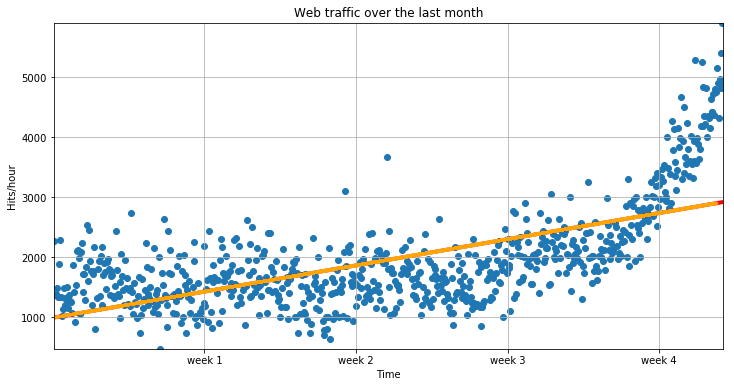

In [39]:
plot.figure(figsize=(12,6))
plot.scatter(x, y)
plot.title("Web traffic over the last month")
plot.xlabel("Time")
plot.ylabel("Hits/hour")
plot.xticks([w*7*24 for w in range(10)], ['week %i'%w for w in range(10)])
plot.autoscale(tight=True)
plot.grid()
plot.plot(train, linear.predict(train), color="red",linewidth=4)
plot.plot(x_test, linear.predict(x_test), color='orange', linewidth=3)
plot.show()

In [41]:
##Comprobar otros modelos que nos puedan dar una mejor aproximación de los datos
## LinearRegression 
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
train = x[::, np.newaxis]
target = y.copy()
linear.fit(train, target)

print("Linear Model : ", linear.score(train, target))

## RandomForest
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor()
train = x[::, np.newaxis]
target = y.copy()
random.fit(train, target)
print("RandomForest Model : ", random.score(train, target))

## Polynomial degree
from sklearn.linear_model import Ridge
import numpy as np

ridge = Ridge()
rtrain = np.vander(x, 4 + 1)
target = y.copy()

ridge.fit(rtrain, target)

print("RidgeRegression Model : ", ridge.score(rtrain, target))

Linear Model :  0.416323690943
RandomForest Model :  0.9495879482
RidgeRegression Model :  0.766499837863


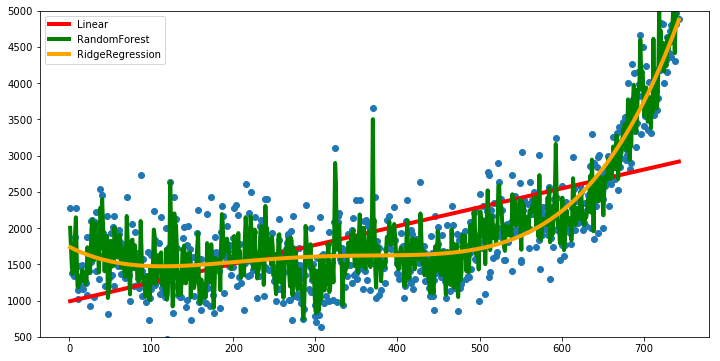

In [42]:
plot.figure(figsize=(12, 6))
plot.scatter(train, target)
#Linear
plot.plot(train, linear.predict(train),color="red", linewidth=4)

#RandomForest
plot.plot(train, random.predict(train),color="green", linewidth=4)

#Ridge
plot.plot(train, ridge.predict(rtrain),color="orange", linewidth=4)

plot.legend(["Linear", "RandomForest", "RidgeRegression"], loc="upper left")


plot.ylim(ymax=5000, ymin=500)

plot.show()

## Cross validation

In [46]:
from sklearn import cross_validation as cv
from sklearn.cross_validation import cross_val_score

def split_data(X_data, y_data):
    """ Split the dataset in train and test """
    return cv.train_test_split(X_data, y_data, test_size=0.1, random_state=0)

X_train, X_test, y_train, y_test = split_data(train, target)
#Linear
linear.fit(X_train, y_train)
print("Linear Model Score : ", linear.score(X_test, y_test))
scores_linear = cross_val_score(linear, X_test, y_test)
print("Linear Model Score mean : ", scores_linear.mean())

#Random
random.fit(X_train, y_train)
print("RandomForest Model Score : ", random.score(X_test, y_test))
scores_random = cross_val_score(random, X_test, y_test)
print("RandomForest Model Score mean : ", scores_random.mean())

#RidgeRegression
rtrain = np.vander(X_train[::, 0], 4 + 1)
rtest = np.vander(X_test[::, 0], 4 + 1)
ridge.fit(rtrain, y_train)
print("RidgeRegression Model Score: ", ridge.score(rtest, y_test))
scores_ridge = cross_val_score(linear, rtest, y_test)
print("RidgeRegression Model Score mean : ", scores_ridge.mean())

Linear Model Score :  0.445069494328
Linear Model Score mean :  0.424167401101
RandomForest Model Score :  0.654603204253
RandomForest Model Score mean :  0.633767450445
RidgeRegression Model Score:  0.725634571317
RidgeRegression Model Score mean :  0.677980697916
